# Loan rejection prediction

In this analysis part we will try different ML models to predict if loan will be rejected.
We will try variuos ML models like:
- Random forest
- Decision tree
- KNeighbors classifier
- Logistic regresion
- Support Vector classifier
- Gradient Boosting classifier
- XGBoost

We will try default models parameters configuration and parameters after the hyperparameter tunning reveived best model parameters. AS well we will try variuos data adjustments and features inputs for best results development.

We will compare models quality metrics, the results and will select the best performin model, which predicts most accurately the laon rejection probability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go
import math

import scipy.stats.distributions as dist
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from generic_functions import value_counts_to_dataframe, pivot_dim2
from modelling_functions import fit_model, kfold_cross_validation

# balancing dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn import model_selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import precision_recall_curve


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.pipeline import Pipeline

from scipy.stats import reciprocal, uniform

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

os.getcwd()

'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3'

# Train & test data loading

As we have prepared train, test target and features datasets we will load them.

We will try variuos combinations of data preparation level:
1. Features dataset with no data preparation, adjustment.
2. Features dataset with only the numeric values normalisation and few categorical values mapping to numeric values without one hot or ordinal encoding techniques to check the baseline of the models.
3. We will try feature datasets with ordinal and one hot endoding, dummy variables methods applied.
4. We will try features scaling technique and check impact on the model results.

As our target dataset is imbalanced we will try oversampling and random under sampling techniques

After the testing the various cases we will select the most promising strategy to proceed on models development, hyperparameters tunning and variuos ML models testing to get best results to predict loans rejection.

## Train features

In [2]:
#Iter 1: Features dateset without any adjustments
#path_file = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_loans/train_test/x_train.csv'
#Iter 2: Features dataset with numeric values normalisation, categorical values ordinal encoding, other mapping to numeric values.
#path_file = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_loans/train_test_ord_en/x_train_ord_en.csv'

#Iter 3: Features dataset with ordinal, one hot encoding, dummy variables
path_file = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_loans/train_test_dum_en/x_train_dum_en.csv'
x_train = pd.read_csv(path_file)
x_train.head(3)

term  grade  sub_grade  emp_length  loan_amnt  funded_amnt  int_rate  \
0   0.0    3.0       17.0         1.0   0.000568     0.000568  0.001409   
1   1.0    4.0       21.0        10.0   0.000761     0.000761  0.001377   
2   0.0    0.0        0.0         1.0   0.000580     0.000580  0.000395   

   installment  annual_inc       dti  fico_range_low  fico_range_high  \
0     0.000705    0.000294  0.001157        0.000991         0.000991   
1     0.000662    0.000231  0.001463        0.001057         0.001057   
2     0.000591    0.000374  0.000354        0.001101         0.001100   

   inq_last_6mths  open_acc   pub_rec  revol_bal  revol_util  \
0        0.004072  0.000928  0.001516   0.000243    0.000888   
1        0.000000  0.000619  0.000000   0.000737    0.001644   
2        0.000000  0.000696  0.000000   0.000623    0.000564   

   ohe__home_ownership_ANY  ohe__home_ownership_MORTGAGE  \
0                      0.0                           1.0   
1                      0.0                           1.0   
2                      0.0                           0.0   

   ohe__home_ownership_NONE  ohe__home_ownership_OWN  \
0                       0.0                      0.0   
1                       0.0                      0.0   
2                       0.0                      0.0   

   ohe__home_ownership_RENT  ohe__verification_status_Not Verified  \
0                       0.0                                    0.0   
1                       0.0                                    0.0   
2                       1.0                                    1.0   

   ohe__verification_status_Source Verified  \
0                                       0.0   
1                                       1.0   
2                                       0.0   

   ohe__verification_status_Verified  ohe__purpose_car  \
0                                1.0               0.0   
1                                0.0               0.0   
2                                0.0               0.0   

   ohe__purpose_credit_card  ohe__purpose_debt_consolidation  \
0                       0.0                              1.0   
1                       0.0                              1.0   
2                       0.0                              1.0   

   ohe__purpose_educational  ohe__purpose_home_improvement  \
0                       0.0                            0.0   
1                       0.0                            0.0   
2                       0.0                            0.0   

   ohe__purpose_house  ohe__purpose_major_purchase  ohe__purpose_medical  \
0                 0.0                          0.0                   0.0   
1                 0.0                          0.0                   0.0   
2                 0.0                          0.0                   0.0   

   ohe__purpose_moving  ohe__purpose_other  ohe__purpose_renewable_energy  \
0                  0.0                 0.0                            0.0   
1                  0.0                 0.0                            0.0   
2                  0.0                 0.0                            0.0   

   ohe__purpose_small_business  ohe__purpose_vacation  ohe__purpose_wedding  \
0                          0.0                    0.0                   0.0   
1                          0.0                    0.0                   0.0   
2                          0.0                    0.0                   0.0   

   ohe__addr_state_AK  ohe__addr_state_AL  ohe__addr_state_AR  \
0                 0.0                 0.0                 0.0   
1                 1.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   ohe__addr_state_AZ  ohe__addr_state_CA  ohe__addr_state_CO  \
0                 0.0                 1.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   ohe__addr_state_CT  o

In [3]:
### If Iter 3: Features dataset with ordinal, one hot encoding, dummy variables. 
# To fix features naming
list(x_train.columns)
x_train = x_train.rename(columns={
    'ohe__verification_status_Not Verified': 'ohe__verification_status_NotVerified',
 'ohe__verification_status_Source Verified':'ohe__verification_status_SourceVerified',
'ohe__application_type_Joint App':'ohe__application_type_JointApp'})

In [4]:
# For iter 1
loan_type = {'MORTGAGE': 1,
             'RENT': 2,
             'OWN': 3,
             'ANY': 4,
             'NONE': 0
            }

verifications = {'Verified': 1,
                 'Source Verified': 2,
                 'Not Verified': 0
                }

purpose_ = {
        'debt_consolidation': 1,
        'home_improvement': 2,
        'credit_card': 3,
        'other': 4,
        'renewable_energy': 5,
        'vacation': 6,
        'small_business': 7,
        'car': 8,
        'major_purchase': 9,
        'medical': 10,
        'house': 11,
        'moving': 12,
        'wedding': 13,
        'educational': 14
        }

application_type_ = {'Individual': 1,
                     'Joint App': 2
                    }

x_train['home_ownership'] = x_train.home_ownership.apply(lambda x: loan_type[x])
x_train['verification_status'] = x_train.verification_status.apply(lambda x: verifications[x])
x_train['purpose'] = x_train.purpose.apply(lambda x: purpose_[x])
x_train['application_type'] = x_train.application_type.apply(lambda x: application_type_[x])

x_train = x_train.drop(columns=['emp_title_mod','addr_state'])
x_train.head(3)

## Train target

In [4]:
#Iter 1: Target dateset without any feautures adjustments
#path_file = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_loans/train_test/y_train.csv'
#Iter 2: Target dataset with features numeric values normalisation, categorical values ordinal encoding, other mapping to numeric values.
#path_file = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_loans/train_test_ord_en/y_train_ord_en.csv'

#Iter 3: Features dataset with ordinal, one hot encoding, dummy variables
path_file = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_loans/train_test_dum_en/y_train_dum_en.csv'
y_train = pd.read_csv(path_file)
y_train.info()
y_train.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954850 entries, 0 to 954849
Data columns (total 1 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   LoanAcceptRejectFlag  954850 non-null  int64
dtypes: int64(1)
memory usage: 7.3 MB


LoanAcceptRejectFlag
0                     0
1                     1
2                     0

## Test features

In [5]:
#Iter 1: Feature dateset without any feautures adjustments
#path_file = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_loans/train_test/x_test.csv'
#Iter 2: Features dataset with numeric values normalisation, categorical values ordinal encoding, other mapping to numeric values.
#path_file = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_loans/train_test_ord_en/x_test_ord_en.csv'

#Iter 3: Features dataset with ordinal, one hot encoding, dummy variables
path_file = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_loans/train_test_dum_en/x_test_dum_en.csv'
x_test = pd.read_csv(path_file)
x_test.head(3)

term  grade  sub_grade  emp_length  loan_amnt  funded_amnt  int_rate  \
0   0.0    1.0        6.0         2.0   0.001219     0.001219  0.001360   
1   0.0    2.0       13.0         1.0   0.000488     0.000488  0.002151   
2   0.0    0.0        4.0         5.0   0.000813     0.000813  0.001183   

   installment  annual_inc       dti  fico_range_low  fico_range_high  \
0     0.001315    0.001221  0.001362        0.001938         0.001938   
1     0.000568    0.001315  0.000906        0.001982         0.001982   
2     0.000862    0.001277  0.001898        0.002041         0.002041   

   inq_last_6mths  open_acc   pub_rec  revol_bal  revol_util  \
0        0.002041  0.001549  0.002994   0.000909    0.001331   
1        0.000000  0.001084  0.000000   0.000650    0.001451   
2        0.002041  0.002788  0.000000   0.000470    0.000889   

   ohe__home_ownership_ANY  ohe__home_ownership_MORTGAGE  \
0                      0.0                           0.0   
1                      0.0                           0.0   
2                      0.0                           0.0   

   ohe__home_ownership_NONE  ohe__home_ownership_OWN  \
0                       0.0                      0.0   
1                       0.0                      0.0   
2                       0.0                      0.0   

   ohe__home_ownership_RENT  ohe__verification_status_Not Verified  \
0                       1.0                                    0.0   
1                       1.0                                    0.0   
2                       1.0                                    0.0   

   ohe__verification_status_Source Verified  \
0                                       1.0   
1                                       0.0   
2                                       1.0   

   ohe__verification_status_Verified  ohe__purpose_car  \
0                                0.0               0.0   
1                                1.0               0.0   
2                                0.0               0.0   

   ohe__purpose_credit_card  ohe__purpose_debt_consolidation  \
0                       0.0                              1.0   
1                       0.0                              1.0   
2                       0.0                              1.0   

   ohe__purpose_educational  ohe__purpose_home_improvement  \
0                       0.0                            0.0   
1                       0.0                            0.0   
2                       0.0                            0.0   

   ohe__purpose_house  ohe__purpose_major_purchase  ohe__purpose_medical  \
0                 0.0                          0.0                   0.0   
1                 0.0                          0.0                   0.0   
2                 0.0                          0.0                   0.0   

   ohe__purpose_moving  ohe__purpose_other  ohe__purpose_renewable_energy  \
0                  0.0                 0.0                            0.0   
1                  0.0                 0.0                            0.0   
2                  0.0                 0.0                            0.0   

   ohe__purpose_small_business  ohe__purpose_vacation  ohe__purpose_wedding  \
0                          0.0                    0.0                   0.0   
1                          0.0                    0.0                   0.0   
2                          0.0                    0.0                   0.0   

   ohe__addr_state_AK  ohe__addr_state_AL  ohe__addr_state_AR  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   ohe__addr_state_AZ  ohe__addr_state_CA  ohe__addr_state_CO  \
0                 0.0                 1.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   ohe__addr_state_CT  o

In [6]:
### If Iter 3: Features dataset with ordinal, one hot encoding, dummy variables
# To fix features naming
x_test = x_test.rename(columns={
    'ohe__verification_status_Not Verified': 'ohe__verification_status_NotVerified',
 'ohe__verification_status_Source Verified':'ohe__verification_status_SourceVerified',
'ohe__application_type_Joint App':'ohe__application_type_JointApp'})

In [8]:
# For iter 1
x_test['home_ownership'] = x_test.home_ownership.apply(lambda x: loan_type[x])
x_test['verification_status'] = x_test.verification_status.apply(lambda x: verifications[x])
x_test['purpose'] = x_test.purpose.apply(lambda x: purpose_[x])
x_test['application_type'] = x_test.application_type.apply(lambda x: application_type_[x])

x_test = x_test.drop(columns=['emp_title_mod','addr_state'])
x_test.head(3)

term  grade  sub_grade  emp_length  home_ownership  verification_status  \
0   0.0    1.0        6.0         2.0               2                    2   
1   0.0    2.0       13.0         1.0               2                    1   
2   0.0    0.0        4.0         5.0               2                    2   

   purpose  application_type  loan_amnt  funded_amnt  int_rate  installment  \
0        1                 1   0.001219     0.001219  0.001360     0.001315   
1        1                 1   0.000488     0.000488  0.002151     0.000568   
2        1                 1   0.000813     0.000813  0.001183     0.000862   

   annual_inc       dti  fico_range_low  fico_range_high  inq_last_6mths  \
0    0.001221  0.001362        0.001938         0.001938        0.002041   
1    0.001315  0.000906        0.001982         0.001982        0.000000   
2    0.001277  0.001898        0.002041         0.002041        0.002041   

   open_acc   pub_rec  revol_bal  revol_util  
0  0.001549  0.002994   0.000909    0.001331  
1  0.001084  0.000000   0.000650    0.001451  
2  0.002788  0.000000   0.000470    0.000889

## Test target

In [7]:
#Iter 1: Target dateset without feature any feautures adjustments
#path_file = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_loans/train_test/y_test.csv'
#Iter 2: Target dataset with features numeric values normalisation, categorical values ordinal encoding, other mapping to numeric values.
#path_file = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_loans/train_test_ord_en/y_test_ord_en.csv'

#Iter 3: Features dataset with ordinal, one hot encoding, dummy variables
path_file = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_loans/train_test_dum_en/y_test_dum_en.csv'
y_test = pd.read_csv(path_file)
y_test.head(3)

LoanAcceptRejectFlag
0                     0
1                     0
2                     0

# Baseline

In [8]:
res_df = pd.DataFrame()

baseline = {'model_name': 'Baseline',
          'acc': 85.95859623664608,
          'precision': 85.95859623664608,
          'recall': 85.95859623664608,
          'f1': 85.95859623664608
        }
res_df = pd.concat([res_df, pd.DataFrame.from_dict(baseline,orient='index').T])
res_df

model_name        acc  precision     recall         f1
0   Baseline  85.958596  85.958596  85.958596  85.958596

## Random forest: few variables, basic normalisation

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(954850, 102)
(238713, 102)
(954850, 1)
(238713, 1)


ROC_AUC Score :  50.46%


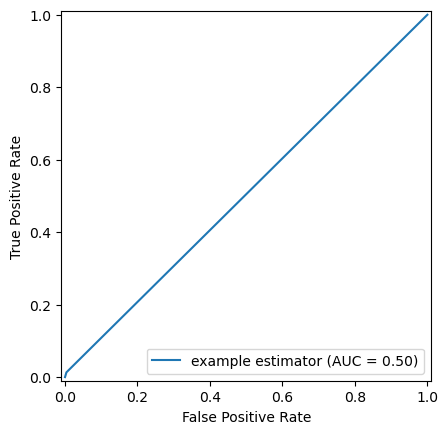

{'acc_in_fold_1': 0.8595014923810023}
{'acc_in_fold_2': 0.8599151699219773}
{'acc_in_fold_3': 0.8595014923810023}
{'acc_in_fold_4': 0.8592082526051212}
{'acc_in_fold_5': 0.8602817196418285}
Cross Validation Score :  85.97%
CPU times: user 14min 3s, sys: 8.95 s, total: 14min 12s
Wall time: 14min 16s


{'model_name': 'Random Forest',
 'acc': 85.83906196981313,
 'precision': 60.8806101759298,
 'recall': 50.46325950642587,
 'f1': 47.44823031769675}

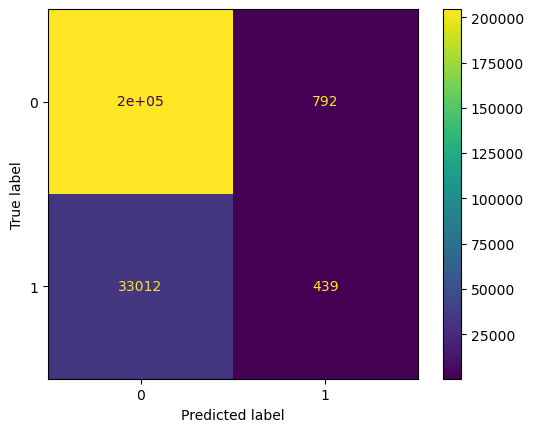

In [21]:
%%time
rf = RandomForestClassifier()

res = fit_model('Random Forest',rf,x_train,y_train,x_test,y_test)
# res_df = res_df.append(pd.DataFrame.from_dict(res,orient='index').T)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Random Forest',rf,x_train,y_train)
res

An AUC of 50% indicates that the model's performance is no better than random guessing. It suggests that the model's ability to discriminate between positive and negative classes is very poor and not useful for classification tasks.

Random forest with default configuration gets acc = 85.8%, however, the presiosion (60.8%), recall (50.4%) and f1 (47.4%) is very low and differs significantly from accuracy. This means, that model performance is weak and loans rejection prediction is random.

We can make conclusions, that data without much preparation does not results in good quality model.

## Decision tree: few variables, basic normalisation

With same features adjusment level we will try other model

ROC_AUC Score :  50.38%


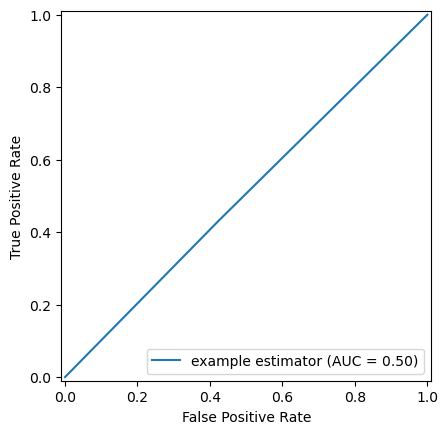

{'acc_in_fold_1': 0.859119233387443}
{'acc_in_fold_2': 0.8595329109284181}
{'acc_in_fold_3': 0.8592291983033984}
{'acc_in_fold_4': 0.8588626485835471}
{'acc_in_fold_5': 0.8598470964025763}
Cross Validation Score :  85.93%
CPU times: user 10min 56s, sys: 4.93 s, total: 11min 1s
Wall time: 11min 4s


{'model_name': 'Decision Tree',
 'acc': 55.596469400493476,
 'precision': 50.18543405087503,
 'recall': 50.376025202383424,
 'f1': 45.22686256898753}

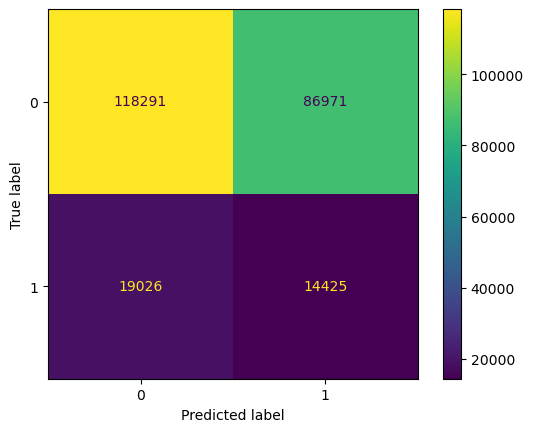

In [14]:
%%time
dtc = DecisionTreeClassifier()

res = fit_model('Decision Tree',dtc,x_train,y_train,x_test,y_test)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Decision Tree',dtc,x_train,y_train)
res

We got again, AUC of 50%. 

Decision tree model with default configuration had acc = 55.5%, the presiosion (50.1%), recall (50.3%) and f1 (45.2%), which is very low for model. This means, that model performance is weak and loans rejection prediction is random.

Similar model quality results was with datasets on iter 2-3

# Oversampling the imbalanced datasets - SMOTE

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

<b>Training data oversampling</b>

In [41]:
%%time

sm = SMOTE()

x_train_res, y_train_res = sm.fit_resample(x_train,y_train)

print("Before OverSampling, counts of label '1': {}".format((y_train==1).sum()[0]))
print("Before OverSampling, counts of label '0': {} \n".format((y_train==0).sum()[0]))

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format((y_train_res==1).sum()[0]))
print("After OverSampling, counts of label '0': {}".format((y_train_res==0).sum()[0]))

Before OverSampling, counts of label '1': 134142
Before OverSampling, counts of label '0': 820708 

After OverSampling, the shape of train_X: (1641416, 102)
After OverSampling, the shape of train_y: (1641416, 1) 

After OverSampling, counts of label '1': 820708
After OverSampling, counts of label '0': 820708
CPU times: user 2min 27s, sys: 2.59 s, total: 2min 30s
Wall time: 25.2 s


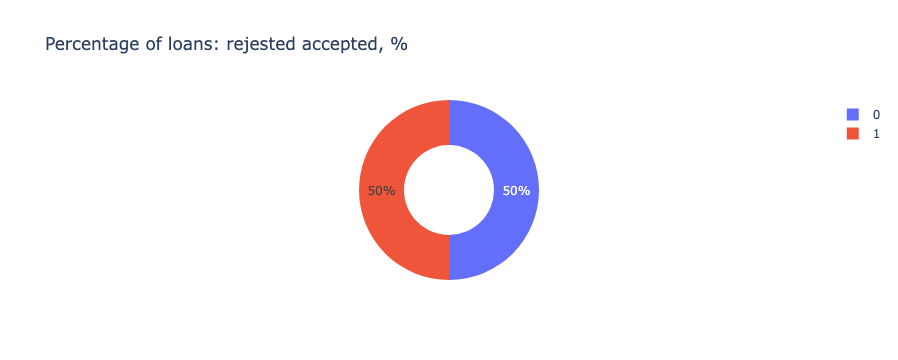

In [42]:
attrib = 'LoanAcceptRejectFlag'
temp_df = value_counts_to_dataframe(y_train_res,attrib)

fig = px.pie(temp_df, values='counts', 
       names='LoanAcceptRejectFlag', 
       hole=.5,
       title=f'Percentage of loans: rejested accepted, %')
fig.show()

<b>Test data oversampling</b>

In [43]:
%%time

sm = SMOTE()

x_test_res, y_test_res = sm.fit_resample(x_test,y_test)

print("Before OverSampling, counts of label '1': {}".format((y_test==1).sum()[0]))
print("Before OverSampling, counts of label '0': {} \n".format((y_test==0).sum()[0]))

print('After OverSampling, the shape of test_X: {}'.format(x_test_res.shape))
print('After OverSampling, the shape of test_y: {} \n'.format(y_test_res.shape))

print("After OverSampling, counts of label '1': {}".format((y_test_res==1).sum()[0]))
print("After OverSampling, counts of label '0': {}".format((y_test_res==0).sum()[0]))

Before OverSampling, counts of label '1': 33451
Before OverSampling, counts of label '0': 205262 

After OverSampling, the shape of test_X: (410524, 102)
After OverSampling, the shape of test_y: (410524, 1) 

After OverSampling, counts of label '1': 205262
After OverSampling, counts of label '0': 205262
CPU times: user 11.6 s, sys: 933 ms, total: 12.5 s
Wall time: 2.15 s


## Random forest

ROC_AUC Score :  64.53%


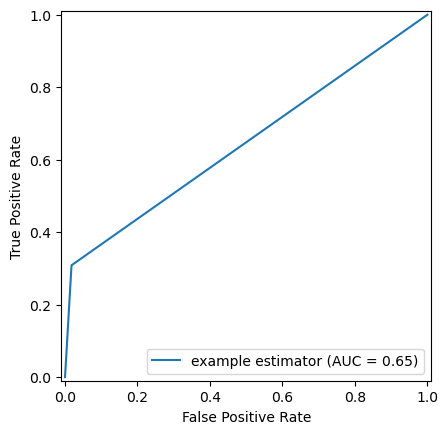

{'acc_in_fold_1': 0.853489661390747}
{'acc_in_fold_2': 0.8545005376458726}
{'acc_in_fold_3': 0.8691068376979618}
{'acc_in_fold_4': 0.9595531903875619}
{'acc_in_fold_5': 0.9611646049292836}
Cross Validation Score :  89.96%
CPU times: user 32min 48s, sys: 32.1 s, total: 33min 20s
Wall time: 33min 47s


{'model_name': 'Random Forest oversamling',
 'acc': 64.53410762829944,
 'precision': 76.60115897046812,
 'recall': 64.53410762829944,
 'f1': 59.99754093292237}

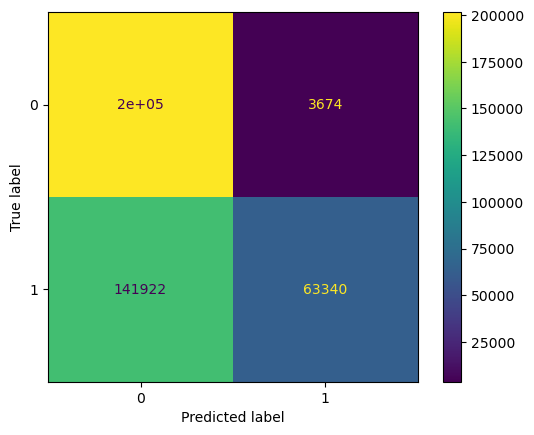

In [44]:
%%time
rf = RandomForestClassifier()

res = fit_model('Random Forest oversampling',rf,x_train_res,y_train_res,x_test_res,y_test_res)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Random Forest',rf,x_train_res,y_train_res)
res

Using oversampling teachnique datasets size and number of records increased double. It impacts model performance - the duration to get results.

Besides the model quality using oversmapling technique and feature dataset with normalisation, ordinal, one hot endocing and dummy variables still does not improve that much. However, we get slighly better results for loans rejection prediction:
- acc = 61.9%
- recal = 76.3%
- precision = 61.9%
- f1 = 55.9%

It it slightly more than half of accuratly prediction loans class.

# Random Under Sampler

The Random Under Sampler method is a technique used in machine learning to address class imbalance problems in classification tasks.

<b>Training data under sampling</b>

In [8]:
rus = RandomUnderSampler(random_state=42)
x_train_underesam, y_train_underesam = rus.fit_resample(x_train, y_train)

print("Before RandomUnderSampler, counts of label '1': {}".format((y_train==1).sum()[0]))
print("Before RandomUnderSampler, counts of label '0': {} \n".format((y_train==0).sum()[0]))

print('After RandomUnderSampler, the shape of train_X: {}'.format(x_train_underesam.shape))
print('After RandomUnderSampler, the shape of train_y: {} \n'.format(y_train_underesam.shape))

print("After RandomUnderSampler, counts of label '1': {}".format((y_train_underesam==1).sum()[0]))
print("After RandomUnderSampler, counts of label '0': {}".format((y_train_underesam==0).sum()[0]))

Before RandomUnderSampler, counts of label '1': 134142
Before RandomUnderSampler, counts of label '0': 820708 

After RandomUnderSampler, the shape of train_X: (268284, 102)
After RandomUnderSampler, the shape of train_y: (268284, 1) 

After RandomUnderSampler, counts of label '1': 134142
After RandomUnderSampler, counts of label '0': 134142


<b>Test data under sampling</b>

In [9]:
rus = RandomUnderSampler(random_state=42)
x_test_underesam, y_test_underesam = rus.fit_resample(x_test, y_test)

print("Before RandomUnderSampler, counts of label '1': {}".format((y_test==1).sum()[0]))
print("Before RandomUnderSampler, counts of label '0': {} \n".format((y_test==0).sum()[0]))

print('After RandomUnderSampler, the shape of test_X: {}'.format(x_test_underesam.shape))
print('After RandomUnderSampler, the shape of test_y: {} \n'.format(y_test_underesam.shape))

print("After RandomUnderSampler, counts of label '1': {}".format((y_test_underesam==1).sum()[0]))
print("After RandomUnderSampler, counts of label '0': {}".format((y_test_underesam==0).sum()[0]))

Before RandomUnderSampler, counts of label '1': 33451
Before RandomUnderSampler, counts of label '0': 205262 

After RandomUnderSampler, the shape of test_X: (66902, 102)
After RandomUnderSampler, the shape of test_y: (66902, 1) 

After RandomUnderSampler, counts of label '1': 33451
After RandomUnderSampler, counts of label '0': 33451


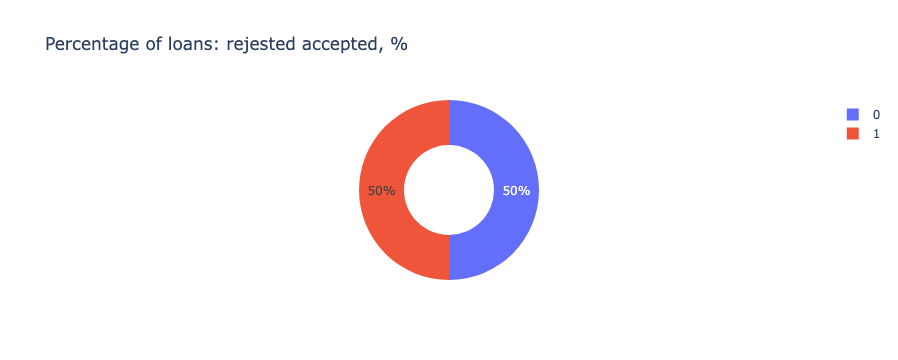

In [47]:
attrib = 'LoanAcceptRejectFlag'
temp_df = value_counts_to_dataframe(y_train_underesam,attrib)

fig = px.pie(temp_df, values='counts', 
       names='LoanAcceptRejectFlag', 
       hole=.5,
       title=f'Percentage of loans: rejested accepted, %')
fig.show()

## Random forest

ROC_AUC Score :  59.11%


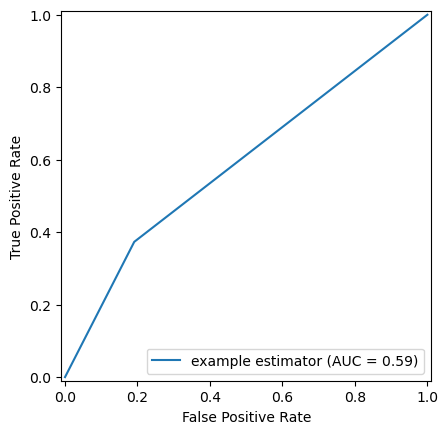

{'acc_in_fold_1': 0.4059675345248523}
{'acc_in_fold_2': 0.404718862403787}
{'acc_in_fold_3': 0.6501481633337682}
{'acc_in_fold_4': 0.39502767579253406}
{'acc_in_fold_5': 0.3979797226777993}
Cross Validation Score :  45.08%
CPU times: user 3min 44s, sys: 1.97 s, total: 3min 46s
Wall time: 3min 46s


{'model_name': 'Random Forest undersampling',
 'acc': 59.11183522166752,
 'precision': 61.24702557676363,
 'recall': 59.11183522166752,
 'f1': 57.074540412620436}

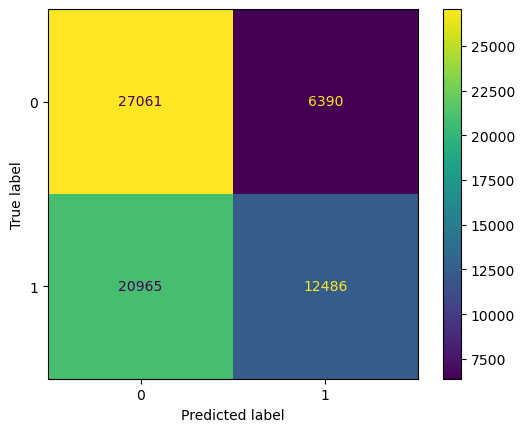

In [48]:
%%time
rf = RandomForestClassifier()

res = fit_model('Random Forest undersampling',rf,x_train_underesam,y_train_underesam,x_test_underesam,y_test_underesam)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Random Forest',rf,x_train_underesam,y_train_underesam)
res

The Random forest model quality using under smapling technique and feature dataset with normalisation, ordinal, one hot endocing and dummy variables gives such results for loans rejection prediction:
- acc = 59.1%
- recal = 61.2%
- precision = 59.1%
- f1 = 57.1%

## Random forest scalled data

Lets apply scalling technique on the features data and check model results then:

In [10]:
x_train_scaled = StandardScaler().fit_transform(x_train_underesam)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=list(x_train_underesam.columns))

y_train_scaled = y_train_underesam

x_test_scaled = StandardScaler().fit_transform(x_test_underesam)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=list(x_test_underesam.columns))

y_test_scaled = y_test_underesam

ROC_AUC Score :  65.07%


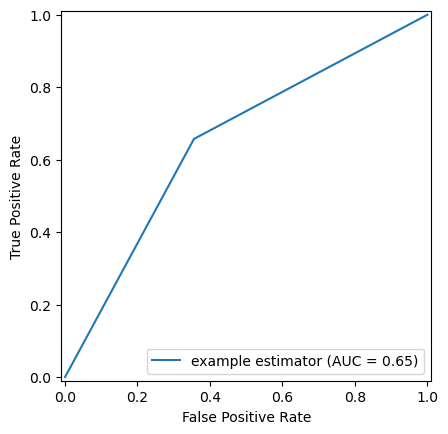

{'acc_in_fold_1': 0.4064893676500736}
{'acc_in_fold_2': 0.4050170527610563}
{'acc_in_fold_3': 0.6507631809456361}
{'acc_in_fold_4': 0.39502767579253406}
{'acc_in_fold_5': 0.40157671089906066}
Cross Validation Score :  45.18%
CPU times: user 3min 46s, sys: 2.2 s, total: 3min 48s
Wall time: 3min 49s


{'model_name': 'Random Forest scalled',
 'acc': 65.07279304056681,
 'precision': 65.07536587905906,
 'recall': 65.07279304056681,
 'f1': 65.071302763358}

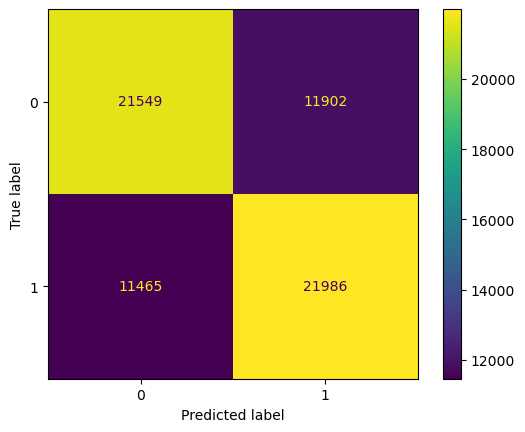

In [50]:
%%time
rf = RandomForestClassifier()

res = fit_model('Random Forest scalled',rf,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Random Forest',rf,x_train_scaled,y_train_scaled)
res

The Random forest model with scalled data on normalised, applied ordinal and one hot encoding, dummy variables and undersampling tehcniques gives the best model quality so far for loans rejection prediction:
- acc = 65.1%
- recal = 65.1%
- precision = 65.1%
- f1 = 65.1%

Model quality metrics are very similar, which gives good sign to procceed on this strategy to develop model further and try other models, too.

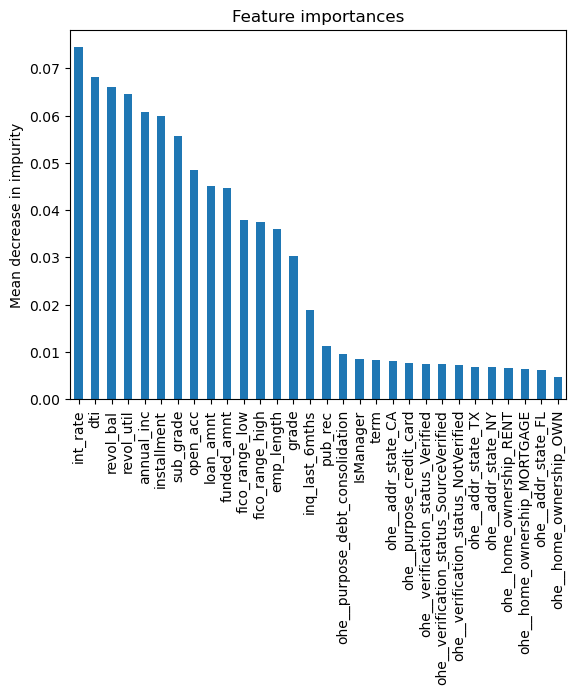

In [58]:
feature_importances = pd.Series(rf.feature_importances_, index=x_train_scaled.columns).sort_values(ascending=False)

top_feature_importance = feature_importances.sort_values(ascending=False).head(30)

fig, ax = plt.subplots()
top_feature_importance.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

The most weight in the model had interest rate feature.

In later significant place are DTI, revol_bal, rovol_util, annual_income.

# Models development

## Random forest: Hyperparameter Tuning

Lets try various combinations of parameters with Random forest model and check if they can give better model quality performance.

In [65]:
%%time
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 200, 300, 1000]
}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid,n_jobs=-1)
grid.fit(x_train_scaled,np.ravel(y_train_scaled))

In [ ]:
%%time
grid.best_params_

ROC_AUC Score :  65.54%


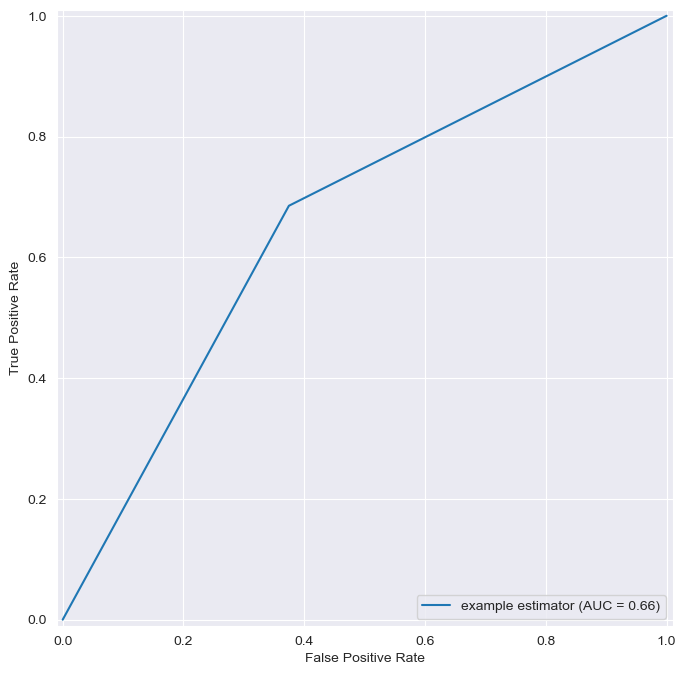

{'acc_in_fold_1': 0.35704567903535417}
{'acc_in_fold_2': 0.3521441750377397}
{'acc_in_fold_3': 0.6547142031794547}
{'acc_in_fold_4': 0.3571202266246715}
{'acc_in_fold_5': 0.3635940062621142}
Cross Validation Score :  41.69%
CPU times: user 13min 58s, sys: 5.19 s, total: 14min 3s
Wall time: 14min 7s


{'model_name': 'Random Forest HT',
 'acc': 65.5406415353801,
 'precision': 65.59661828373211,
 'recall': 65.5406415353801,
 'f1': 65.5096948407608}

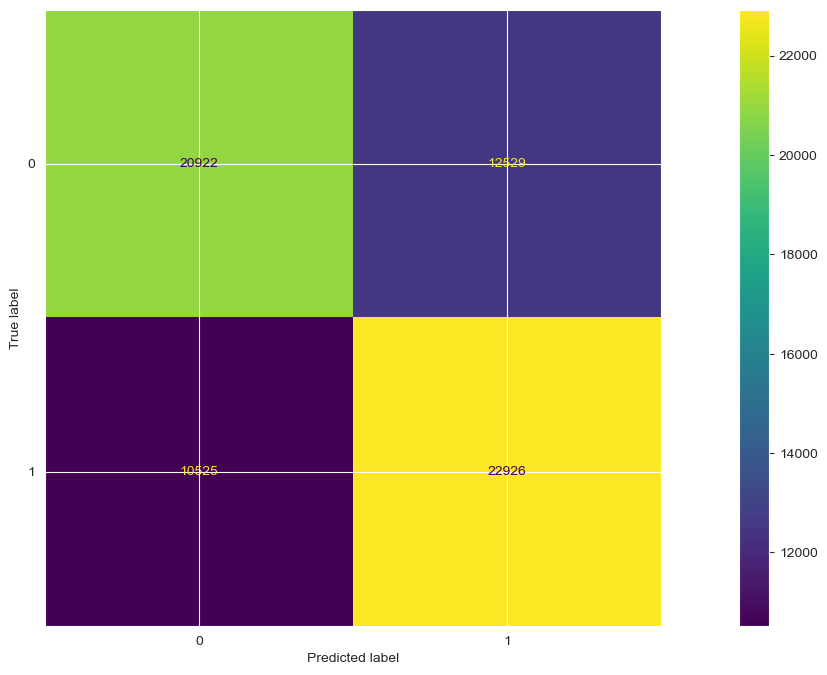

In [30]:
%%time
rfc = RandomForestClassifier(n_estimators=1000,criterion='entropy',max_features=3,max_depth=120,bootstrap=True,
                            min_samples_leaf=3,min_samples_split=8)

res = fit_model('Random Forest HT',rfc,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Random Forest',rfc,x_train_scaled,y_train_scaled)
res

Hyperparameter tuning helped to increase accuracy and other quality metrics. The increase is slight per 0.5% points.

## Decision Tree

ROC_AUC Score :  57.08%


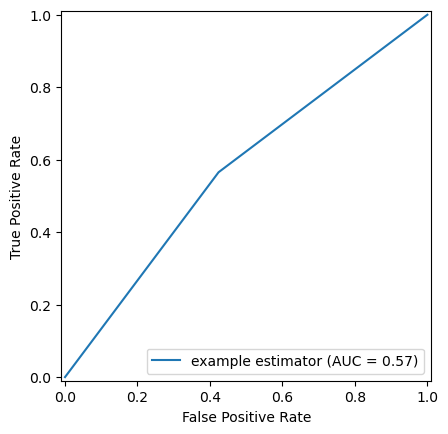

{'acc_in_fold_1': 0.47136440725348044}
{'acc_in_fold_2': 0.4725944424772164}
{'acc_in_fold_3': 0.5739605270514565}
{'acc_in_fold_4': 0.46771157537693125}
{'acc_in_fold_5': 0.46796257641270317}
Cross Validation Score :  49.07%
CPU times: user 23.7 s, sys: 334 ms, total: 24 s
Wall time: 23.8 s


{'model_name': 'Decision Tree',
 'acc': 57.080505814474904,
 'precision': 57.081353549717036,
 'recall': 57.080505814474904,
 'f1': 57.07922126285281}

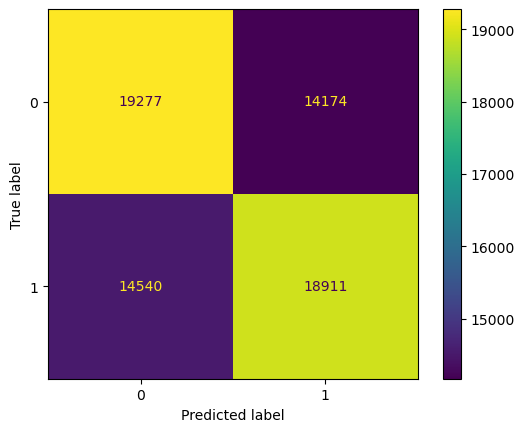

In [74]:
%%time
dtc = DecisionTreeClassifier()

res = fit_model('Decision Tree',dtc,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Decision Tree',dtc,x_train_scaled,y_train_scaled)
res

### Hyperparameter Tuning

In [75]:
%%time
param_grid = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth': [4,6,8,12],
    'max_features': list((range(1,len(x_train.columns) + 1)))
}

dtcc = DecisionTreeClassifier()
rnd_search_cv = RandomizedSearchCV(dtcc, param_grid, n_iter=10, verbose=2)
rnd_search_cv.fit(x_train_scaled,np.ravel(y_train_scaled))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=6, max_features=68, splitter=best; total time=   1.0s
[CV] END criterion=entropy, max_depth=6, max_features=68, splitter=best; total time=   0.8s
[CV] END criterion=entropy, max_depth=6, max_features=68, splitter=best; total time=   0.8s
[CV] END criterion=entropy, max_depth=6, max_features=68, splitter=best; total time=   0.7s
[CV] END criterion=entropy, max_depth=6, max_features=68, splitter=best; total time=   0.8s
[CV] END criterion=entropy, max_depth=8, max_features=26, splitter=random; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=26, splitter=random; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=26, splitter=random; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=26, splitter=random; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=26, splitter=random; total time=   0.2s
[CV] END 

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8, 12],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [76]:
%%time
rnd_search_cv.best_params_

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs


{'splitter': 'best', 'max_features': 71, 'max_depth': 8, 'criterion': 'gini'}

ROC_AUC Score :  64.72%


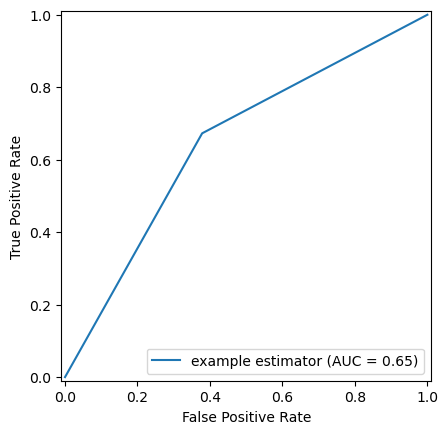

{'acc_in_fold_1': 0.37050151890713234}
{'acc_in_fold_2': 0.35143597293922507}
{'acc_in_fold_3': 0.6460853197159737}
{'acc_in_fold_4': 0.3729615893546043}
{'acc_in_fold_5': 0.36432085880423437}
Cross Validation Score :  42.11%
CPU times: user 6.77 s, sys: 352 ms, total: 7.13 s
Wall time: 6.85 s


{'model_name': 'Decision Tree HT',
 'acc': 64.71704881767361,
 'precision': 64.75574406520958,
 'recall': 64.71704881767361,
 'f1': 64.69390226902802}

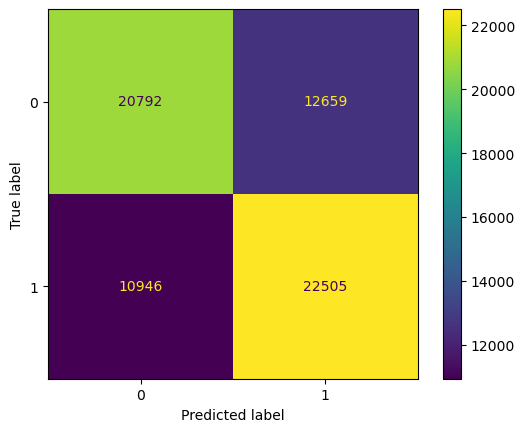

In [77]:
%%time
dtcc = DecisionTreeClassifier(splitter='best',max_features=71,max_depth=8,criterion='gini')

res = fit_model('Decision Tree HT',dtcc,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Decision Tree HT',dtcc,x_train_scaled,y_train_scaled)
res

## KNeighbors Classifier

ROC_AUC Score :  57.62%


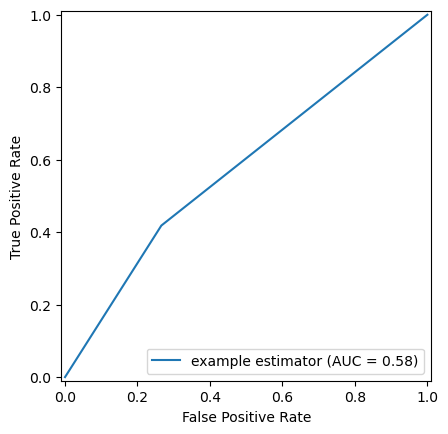

{'acc_in_fold_1': 0.578023370669251}
{'acc_in_fold_2': 0.5751346515832044}
{'acc_in_fold_3': 0.5747060029446298}
{'acc_in_fold_4': 0.2548036602866355}
{'acc_in_fold_5': 0.2549015953481437}
Cross Validation Score :  44.75%
CPU times: user 11min 37s, sys: 5.83 s, total: 11min 43s
Wall time: 1min 39s


{'model_name': 'KNeighbors Classifier',
 'acc': 57.62010104331709,
 'precision': 58.465155130279236,
 'recall': 57.62010104331709,
 'f1': 56.53536100440809}

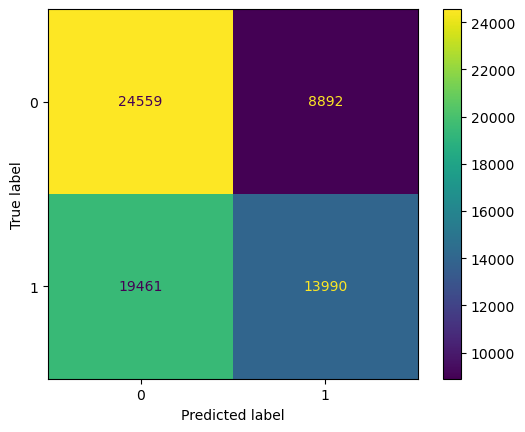

In [81]:
%%time
knn = KNeighborsClassifier(4)

res = fit_model('KNeighbors Classifier',knn,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('KNeighbors Classifier',knn,x_train_scaled,y_train_scaled)
res

### Hyperparameter Tuning

In [83]:
%%time
param_grid = {
    'n_neighbors' : [5,7,9,11,13,15],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}

knnc = KNeighborsClassifier()
grid = GridSearchCV(knnc, param_grid, verbose = 1, cv=3, n_jobs = -1)
grid.fit(x_train_scaled,np.ravel(y_train_scaled))

In [ ]:
%%time
grid.best_params_

ROC_AUC Score :  58.99%


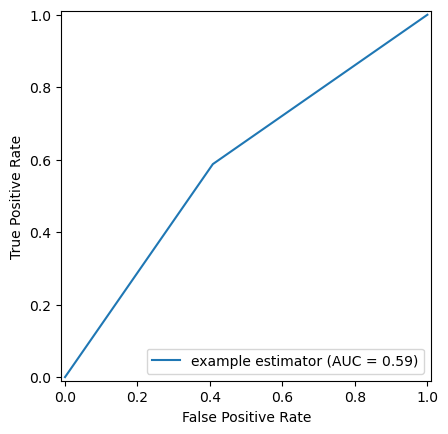

{'acc_in_fold_1': 0.40803623012840823}
{'acc_in_fold_2': 0.4100117412453175}
{'acc_in_fold_3': 0.5889073187095812}
{'acc_in_fold_4': 0.39959371563822055}
{'acc_in_fold_5': 0.39551960638139255}
Cross Validation Score :  44.04%
CPU times: user 12min 12s, sys: 4.21 s, total: 12min 16s
Wall time: 1min 38s


{'model_name': 'KNeighbors Classifier HT',
 'acc': 58.99375205524498,
 'precision': 58.99391412695516,
 'recall': 58.99375205524498,
 'f1': 58.99356731969551}

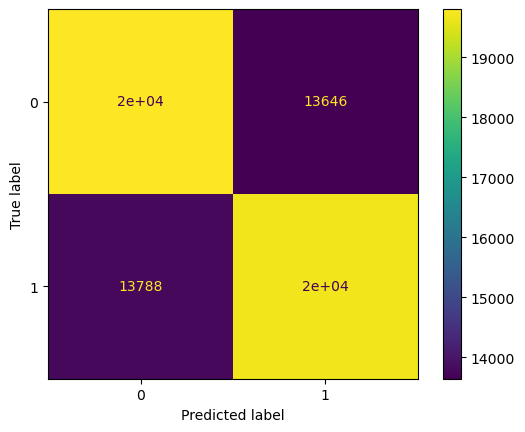

In [88]:
%%time
knnc = KNeighborsClassifier(metric='euclidean',n_neighbors=15, weights='distance')

res = fit_model('KNeighbors Classifier HT',knnc,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('KNeighbors Classifier HT',knnc,x_train_scaled,y_train_scaled)
res

## Logistic regresion

ROC_AUC Score :  65.51%


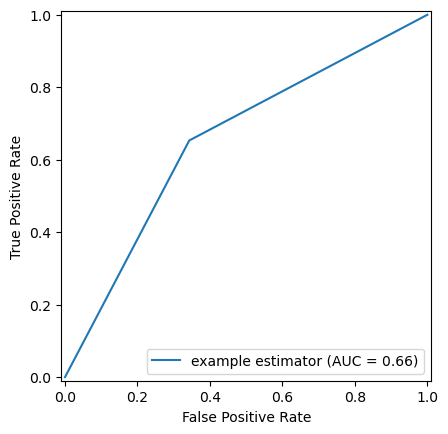

{'acc_in_fold_1': 0.39968690012486724}
{'acc_in_fold_2': 0.4025756192109138}
{'acc_in_fold_3': 0.654900572152748}
{'acc_in_fold_4': 0.37273794658665227}
{'acc_in_fold_5': 0.37319218726703446}
Cross Validation Score :  44.06%
CPU times: user 45.2 s, sys: 1.26 s, total: 46.4 s
Wall time: 6.72 s


{'model_name': 'Logistic Regression',
 'acc': 65.50626289199127,
 'precision': 65.5065384004097,
 'recall': 65.50626289199127,
 'f1': 65.50610967666812}

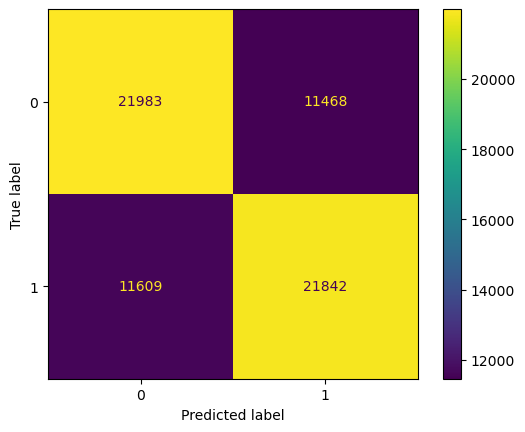

In [89]:
%%time
lr = LogisticRegression(random_state=42)

res = fit_model('Logistic Regression',lr,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Logistic Regression',lr,x_train_scaled,y_train_scaled)
res

### Hyperparameter Tuning

In [91]:
%%time
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]


lrc = LogisticRegression()
grid = GridSearchCV(lrc, param_grid, verbose = 1, cv=3, n_jobs = -1)
grid.fit(x_train_scaled,np.ravel(y_train_scaled))
clear_ouput()

In [ ]:
grid.best_params_

ROC_AUC Score :  65.51%


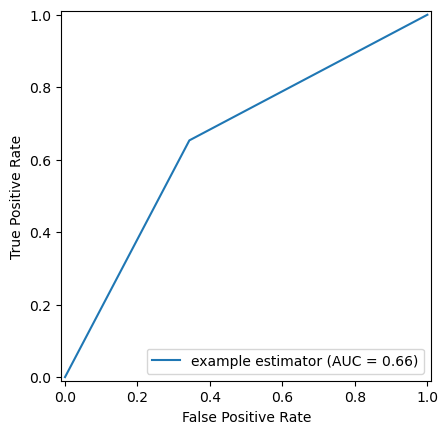

{'acc_in_fold_1': 0.3996123525355499}
{'acc_in_fold_2': 0.4023519764429618}
{'acc_in_fold_3': 0.6548260245634306}
{'acc_in_fold_4': 0.3728311310732989}
{'acc_in_fold_5': 0.37324809900104367}
Cross Validation Score :  44.06%
CPU times: user 6min 10s, sys: 1.28 s, total: 6min 11s
Wall time: 6min 6s


{'model_name': 'Logistic Regression HT',
 'acc': 65.50775761561687,
 'precision': 65.50795718727925,
 'recall': 65.50775761561687,
 'f1': 65.50764664522576}

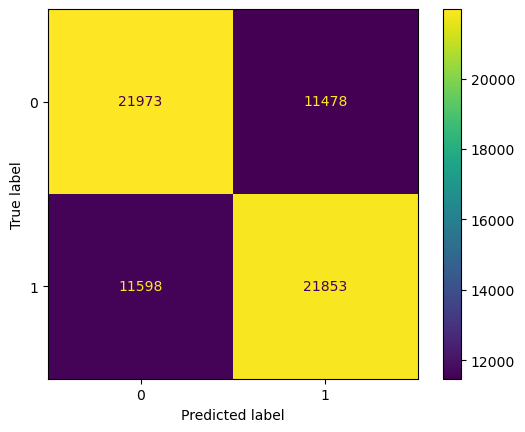

In [103]:
%%time
lrc = LogisticRegression(max_iter=1000,penalty= 'l2',solver='sag')

res = fit_model('Logistic Regression HT',lrc,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Logistic Regression HT',lrc,x_train_scaled,y_train_scaled)
res

## Support Vector Classifier

In [ ]:
%%time
clf = SVC(probability=True)

res = fit_model('SVC',clf,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('SVC',clf,x_train_scaled,y_train_scaled)
res

### Hyperparameter Tuning

In [ ]:
%%time
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}


scvc = SVC(probability=True)
grid = GridSearchCV(scvc, param_grid, verbose = 1, cv=3, n_jobs = -1)
grid.fit(x_train,np.ravel(y_train))

In [ ]:
grid.best_params_

In [ ]:
%%time
scvc = SVC(C=10, gamma=1,kernel='rbf',probability=True)

res = fit_model('SVC HT',scvc,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
#res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('SVC HT',scvc,x_train_scaled,y_train_scaled)
res

## GradientBoostingClassifier

ROC_AUC Score :  65.52%


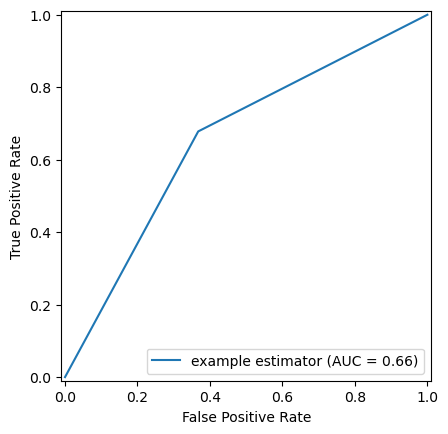

{'acc_in_fold_1': 0.37864584304005067}
{'acc_in_fold_2': 0.38060271725963063}
{'acc_in_fold_3': 0.655012393536724}
{'acc_in_fold_4': 0.39362990849283414}
{'acc_in_fold_5': 0.4005330251975548}
Cross Validation Score :  44.17%
CPU times: user 4min 58s, sys: 1.32 s, total: 4min 59s
Wall time: 5min 2s


{'model_name': 'Gradient Boosting Classifier',
 'acc': 65.52270485187289,
 'precision': 65.55507636531885,
 'recall': 65.52270485187289,
 'f1': 65.5047579262779}

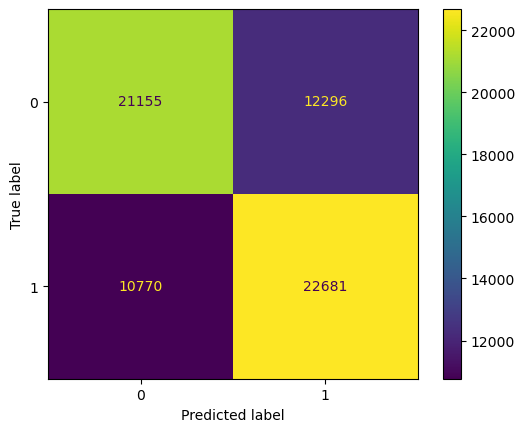

In [13]:
%%time
gbc = GradientBoostingClassifier()

res = fit_model('Gradient Boosting Classifier',gbc,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Gradient Boosting Classifier',gbc,x_train_scaled,y_train_scaled)
res

### Hyperparameter Tuning

In [ ]:
param_grid = {"n_estimators":[1,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

gbcc = GradientBoostingClassifier()
grid = GridSearchCV(gbcc, param_grid, verbose = 1, cv=3, n_jobs = -1)
grid.fit(x_train_scaled,np.ravel(y_train_scaled))

In [ ]:
grid.best_params_

ROC_AUC Score :  65.19%


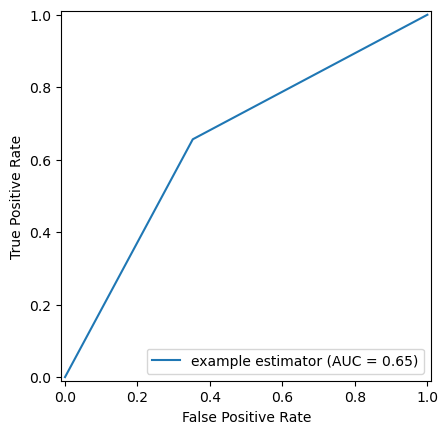

KeyboardInterrupt: 

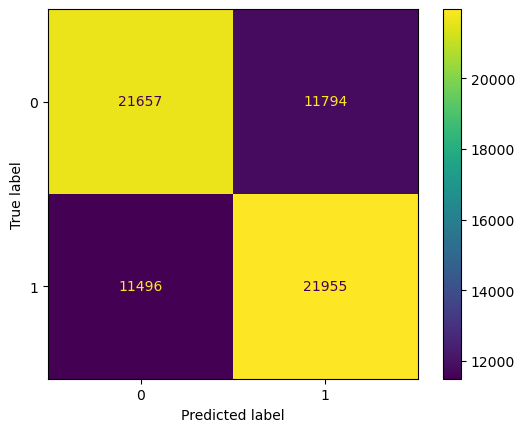

In [14]:
%%time
gbcc = GradientBoostingClassifier(learning_rate=0.1,max_depth= 9,n_estimators= 500)

res = fit_model('GBC HT',gbcc,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
#res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('GBC HT',gbcc,x_train_scaled,y_train_scaled)
res

## XGBoost

In [15]:
%%time

xgbr = xgb.XGBRegressor(tree_method="hist", device="cuda")

my_model= xgbr.fit(x_train_scaled,y_train_scaled)

from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(x_train_scaled)

print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_train_scaled)))

Mean Absolute Error: 0.40564848956060123
CPU times: user 8.87 s, sys: 1.71 s, total: 10.6 s
Wall time: 1.57 s


# Models quality comparison

Let's compare all tried ML models results

In [22]:
res_df = pd.DataFrame()

baseline = {'model_name': 'Baseline',
          'acc': 85.95859623664608,
          'precision': 85.95859623664608,
          'recall': 85.95859623664608,
          'f1': 85.95859623664608
        }
# res_df = pd.concat([res_df, pd.DataFrame.from_dict(baseline,orient='index').T])
# res_df

In [23]:
df1 = {'model_name': 'Random Forest',
 'acc': 85.83906196981313,
 'precision': 60.8806101759298,
 'recall': 50.46325950642587,
 'f1': 47.44823031769675}
df2 = {'model_name': 'Decision Tree',
 'acc': 55.596469400493476,
 'precision': 50.18543405087503,
 'recall': 50.376025202383424,
 'f1': 45.22686256898753}
df3 = {'model_name': 'Random Forest oversamling',
 'acc': 64.53410762829944,
 'precision': 76.60115897046812,
 'recall': 64.53410762829944,
 'f1': 59.99754093292237}
df4 = {'model_name': 'Random Forest undersampling',
 'acc': 59.11183522166752,
 'precision': 61.24702557676363,
 'recall': 59.11183522166752,
 'f1': 57.074540412620436}
df5 = {'model_name': 'Random Forest scalled',
 'acc': 65.07279304056681,
 'precision': 65.07536587905906,
 'recall': 65.07279304056681,
 'f1': 65.071302763358}
df6 = {'model_name': 'Random Forest HT',
 'acc': 65.60192520402978,
 'precision': 65.66022483312129,
 'recall': 65.60192520402978,
 'f1': 65.56988123315654}
df7 = {'model_name': 'Decision Tree scalled',
 'acc': 57.080505814474904,
 'precision': 57.081353549717036,
 'recall': 57.080505814474904,
 'f1': 57.07922126285281}
df8 = {'model_name': 'Decision Tree HT',
 'acc': 64.71704881767361,
 'precision': 64.75574406520958,
 'recall': 64.71704881767361,
 'f1': 64.69390226902802}
df9 = {'model_name': 'KNeighbors Classifier',
 'acc': 57.62010104331709,
 'precision': 58.465155130279236,
 'recall': 57.62010104331709,
 'f1': 56.53536100440809}
df10 = {'model_name': 'KNeighbors Classifier HT',
 'acc': 58.99375205524498,
 'precision': 58.99391412695516,
 'recall': 58.99375205524498,
 'f1': 58.99356731969551}
df11 = {'model_name': 'Logistic Regression',
 'acc': 65.50626289199127,
 'precision': 65.5065384004097,
 'recall': 65.50626289199127,
 'f1': 65.50610967666812}
df12 = {'model_name': 'Logistic Regression HT',
 'acc': 65.50775761561687,
 'precision': 65.50795718727925,
 'recall': 65.50775761561687,
 'f1': 65.50764664522576}
df13 = {'model_name': 'Gradient Boosting Classifier',
 'acc': 65.52270485187289,
 'precision': 65.55507636531885,
 'recall': 65.52270485187289,
 'f1': 65.5047579262779}

res_df = pd.concat([res_df, 
                    pd.DataFrame.from_dict(df1,orient='index').T,
                    pd.DataFrame.from_dict(df2,orient='index').T,
                    pd.DataFrame.from_dict(df3,orient='index').T,
                    pd.DataFrame.from_dict(df4,orient='index').T,
                    pd.DataFrame.from_dict(df5,orient='index').T,
                    pd.DataFrame.from_dict(df6,orient='index').T,
                    pd.DataFrame.from_dict(df7,orient='index').T,
                    pd.DataFrame.from_dict(df8,orient='index').T,
                    pd.DataFrame.from_dict(df9,orient='index').T,
                    pd.DataFrame.from_dict(df10,orient='index').T,
                    pd.DataFrame.from_dict(df11,orient='index').T,
                    pd.DataFrame.from_dict(df12,orient='index').T,
                    pd.DataFrame.from_dict(df13,orient='index').T,])
res_df

model_name        acc  precision     recall         f1
0                 Random Forest  85.839062   60.88061   50.46326   47.44823
0                 Decision Tree  55.596469  50.185434  50.376025  45.226863
0     Random Forest oversamling  64.534108  76.601159  64.534108  59.997541
0   Random Forest undersampling  59.111835  61.247026  59.111835   57.07454
0         Random Forest scalled  65.072793  65.075366  65.072793  65.071303
0              Random Forest HT  65.601925  65.660225  65.601925  65.569881
0         Decision Tree scalled  57.080506  57.081354  57.080506  57.079221
0              Decision Tree HT  64.717049  64.755744  64.717049  64.693902
0         KNeighbors Classifier  57.620101  58.465155  57.620101  56.535361
0      KNeighbors Classifier HT  58.993752  58.993914  58.993752  58.993567
0           Logistic Regression  65.506263  65.506538  65.506263   65.50611
0        Logistic Regression HT  65.507758  65.507957  65.507758  65.507647
0  Gradient Boosting Classifier  65.522705  65.555076  65.522705  65.504758

In [24]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
    
def hist_score(metric,dtf):
    models_names = list(dtf.model_name)

    plt.rcParams['figure.figsize']=20,8
    sns.set_style('darkgrid')
    ax = sns.barplot(x=models_names, y=dtf[metric], palette = "inferno", saturation =2.0)
    plt.xlabel('Classifier Models', fontsize = 20 )
    plt.ylabel(f'% of {metric}', fontsize = 20)
    plt.title(f'{metric} of different models on test set', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    
    wrap_labels(ax, 10)
    ax.figure
    
    plt.show()

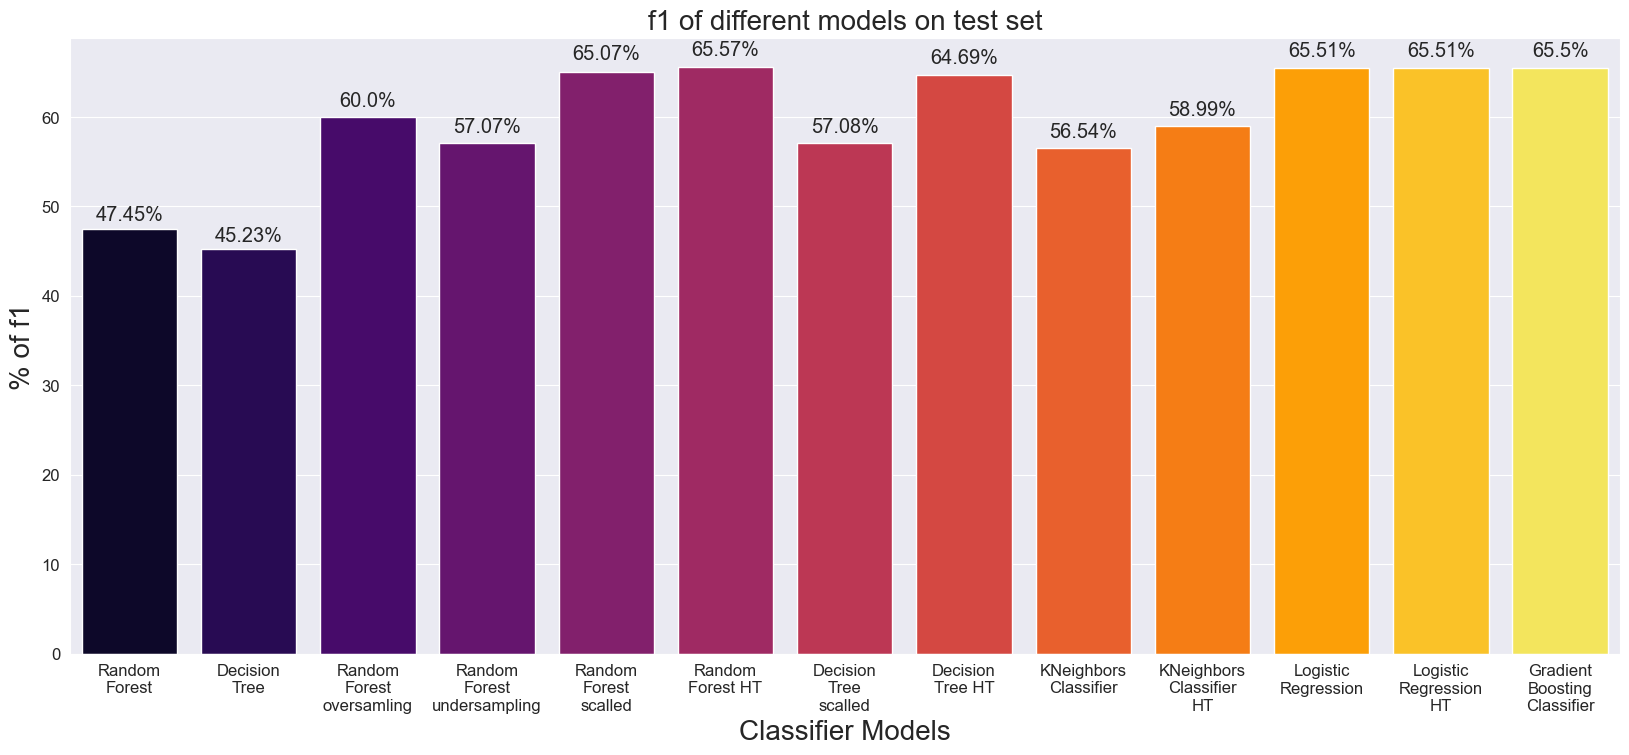

In [27]:
hist_score('f1',res_df)

<b>The best performed model was Random forestwith scalled data and after hyperparameter tunning. F1 score increased was 65.57%.</b>

The second best candidate model to predict loand rejection probability is Logistic Regresion with default parameters and after hyperparameter tunning configuration. F1 = 65.51%. 

Very similar results provided and Gradient Boosting Classifier (F1 = 65.5%)

The least performance was from Decision Tree and KNeighbors Classifiers.

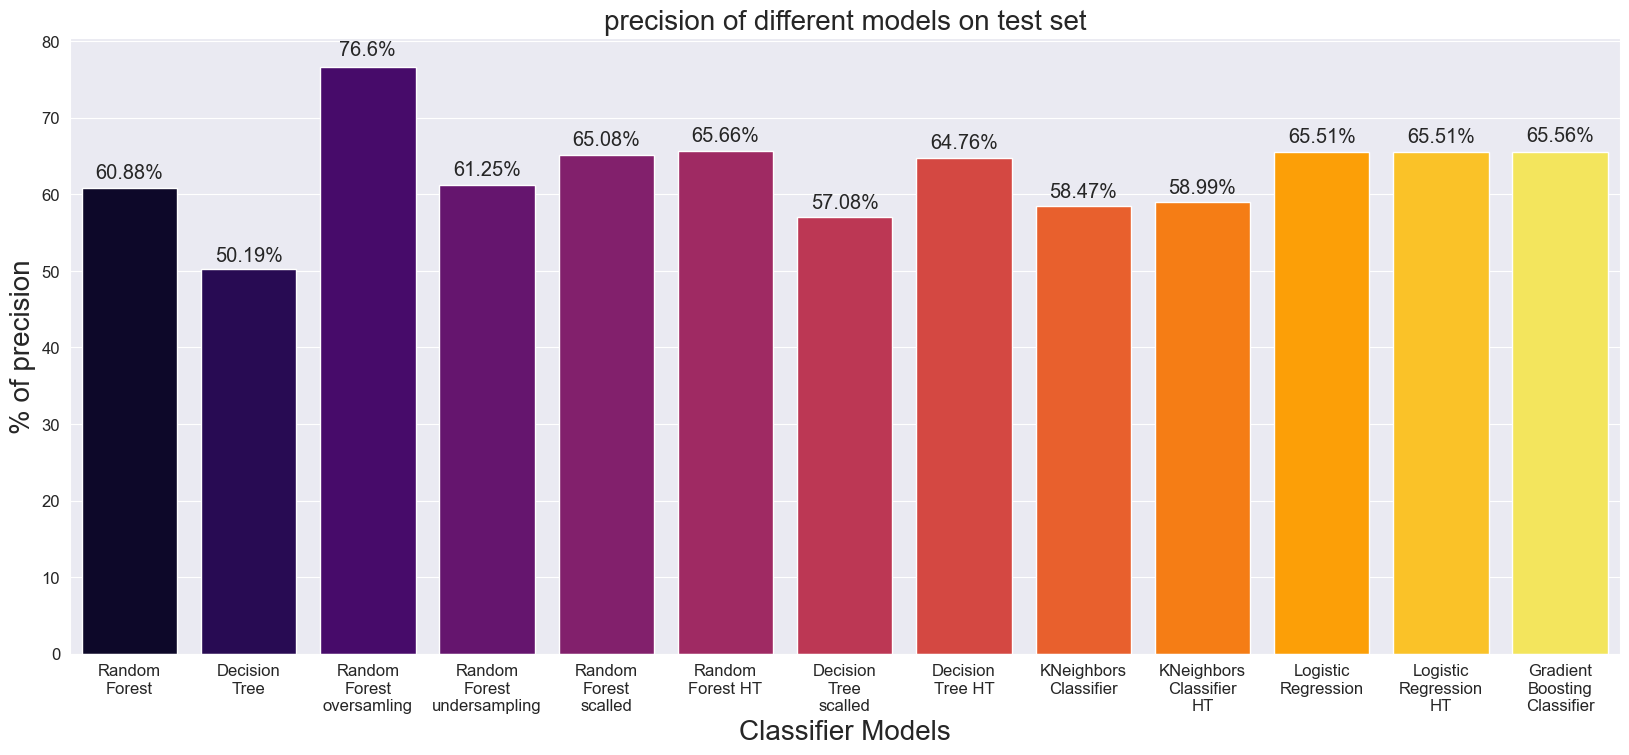

In [28]:
hist_score('precision',res_df)

# SHAP

We will apply SHAP technique to break down how our best performed model (Random forest after hyperparameter tunning) works for an individual prediction, it shows the impact of each feature.

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

In [ ]:
import shap  

explainer = shap.TreeExplainer(rfc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(x_test_scaled)

In [ ]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

colors = ["#9bb7d4", "#0f4c81"]           
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)
shap.summary_plot(shap_values, x_test_scaled,cmap=cmap,alpha=0.4)

ROC_AUC Score :  66.16%


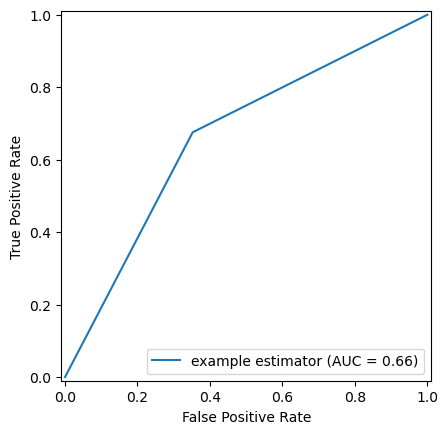

{'acc_in_fold_1': 0.4164228339266079}
{'acc_in_fold_2': 0.42093296308030637}
{'acc_in_fold_3': 0.662914438004361}
{'acc_in_fold_4': 0.4344260767467432}
{'acc_in_fold_5': 0.4374347696436559}
Cross Validation Score :  47.44%
CPU times: user 9min 14s, sys: 1.87 s, total: 9min 15s
Wall time: 9min 17s


{'model_name': 'Random Forest scalled',
 'acc': 66.16244656363038,
 'precision': 66.17505674563337,
 'recall': 66.16244656363038,
 'f1': 66.15585028247995}

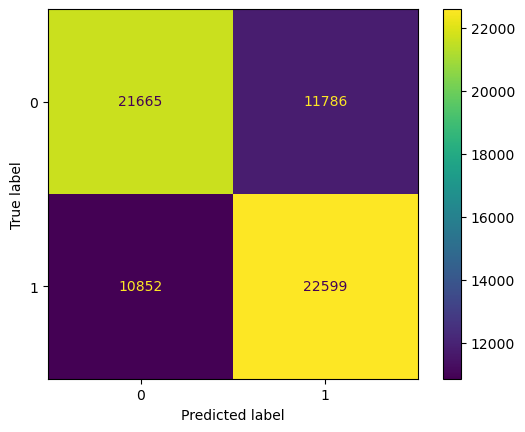

In [12]:
%%time
rf = GradientBoostingClassifier(max_depth = 6, n_estimators= 300, max_features = 0.3)

res = fit_model('Random Forest scalled',rf,x_train_scaled,y_train_scaled,x_test_scaled,y_test_scaled)
kfold_cross_validation('Random Forest',rf,x_train_scaled,y_train_scaled)
res

# Conclusions

- The target value we want to predict and clasify is imbalanced. Which resulted in poor modeling results.
- We have applied oversampling technique to balance the dataset. However, using oversampling teachnique datasets size and number of records increased double. It impacts model performance - the duration to get results. And the effect on the model quality metrics was not significant.
- The opisite technique to balance the dataset was applied too - undersampling. The Random forest model with scalled data on normalised, applied ordinal and one hot encoding, dummy variables and undersampling tehcniques gave the best model quality for loans rejection prediction. The model performance increased and allowed to try other ML models.
- The best performed model was Random forest with scalled data and after hyperparameter tunning using datasets after undersampling. F1 score increased was 65.57%.
- The second best candidate model to predict loand rejection probability is Logistic Regresion with default parameters and after hyperparameter tunning configuration. F1 = 65.51%.
- Very similar results provided and Gradient Boosting Classifier (F1 = 65.5%)
- The least performance was from Decision Tree and KNeighbors Classifiers.